In [1]:
import torch # version 1.3.1

import torchvision

import os

import cv2

import matplotlib.pylab as plt

import re

import random

import pandas as pd

import numpy as np

import seaborn as sns
sns.set()

In [2]:
from os import listdir
from glob import glob

In [3]:
patients = listdir('data/breast-histopathology-images/IDC_regular_ps50_idx5/')
noPatients = len(patients)  # 279 patients in total -> not a lot -> overfitting likely
patients[190:200]  # patients have 4-to-5-digit ids

['12897',
 '9173',
 '9041',
 '10288',
 '12748',
 '8864',
 '12868',
 '13459',
 '16896',
 '9078']

In [118]:
listdir('data/breast-histopathology-images/IDC_regular_ps50_idx5/8864')  # every patient has 2 folders: one for positive, the other for negative patches

['0', '1']

In [81]:
listdir('data/breast-histopathology-images/IDC_regular_ps50_idx5/8864/0')[:5]

['8864_idx5_x2701_y2401_class0.png',
 '8864_idx5_x2751_y2451_class0.png',
 '8864_idx5_x2151_y1001_class0.png',
 '8864_idx5_x2501_y2101_class0.png',
 '8864_idx5_x2151_y2901_class0.png']

In [82]:
listdir('data/breast-histopathology-images/IDC_regular_ps50_idx5/8864/1')[:5]

['8864_idx5_x1851_y2051_class1.png',
 '8864_idx5_x1651_y2701_class1.png',
 '8864_idx5_x2351_y2651_class1.png',
 '8864_idx5_x2301_y2251_class1.png',
 '8864_idx5_x1601_y2801_class1.png']

In [84]:
allImagePatches = glob('data/breast-histopathology-images/IDC_regular_ps50_idx5/**/*.png', recursive=True)

for filename in selectedImagePatches[150000:150020]:
    print(filename)

data/breast-histopathology-images/IDC_regular_ps50_idx5/14304/1/14304_idx5_x1001_y351_class1.png
data/breast-histopathology-images/IDC_regular_ps50_idx5/14304/1/14304_idx5_x751_y201_class1.png
data/breast-histopathology-images/IDC_regular_ps50_idx5/14304/1/14304_idx5_x1701_y851_class1.png
data/breast-histopathology-images/IDC_regular_ps50_idx5/14304/1/14304_idx5_x1451_y501_class1.png
data/breast-histopathology-images/IDC_regular_ps50_idx5/14304/1/14304_idx5_x951_y851_class1.png
data/breast-histopathology-images/IDC_regular_ps50_idx5/14304/1/14304_idx5_x1201_y951_class1.png
data/breast-histopathology-images/IDC_regular_ps50_idx5/14304/1/14304_idx5_x1001_y801_class1.png
data/breast-histopathology-images/IDC_regular_ps50_idx5/14304/1/14304_idx5_x601_y401_class1.png
data/breast-histopathology-images/IDC_regular_ps50_idx5/14304/1/14304_idx5_x1801_y701_class1.png
data/breast-histopathology-images/IDC_regular_ps50_idx5/14304/1/14304_idx5_x1401_y351_class1.png
data/breast-histopathology-images

In [86]:
noAllPatches = len(allImagePatches)
noAllPatches  # 277524

277524

In [87]:
image_class0 = cv2.imread('data/breast-histopathology-images/IDC_regular_ps50_idx5/12905/0/12905_idx5_x1201_y2301_class0.png')
image_class1 = cv2.imread('data/breast-histopathology-images/IDC_regular_ps50_idx5/14304/1/14304_idx5_x1701_y851_class1.png')

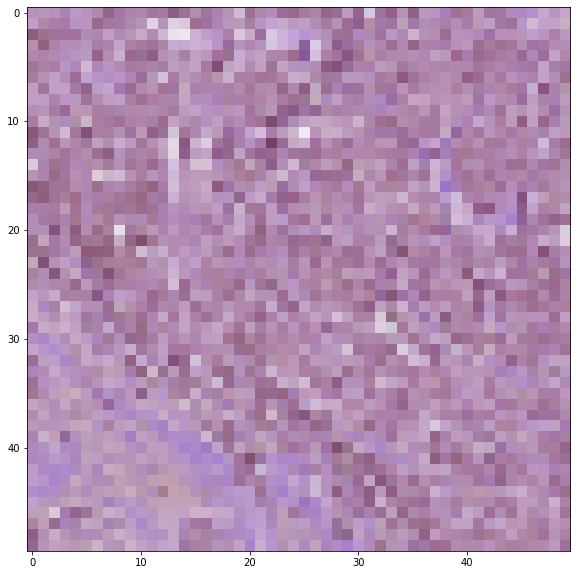

In [88]:
#plt.figure(figsize=(8,8))
plt.imshow(image_class1)

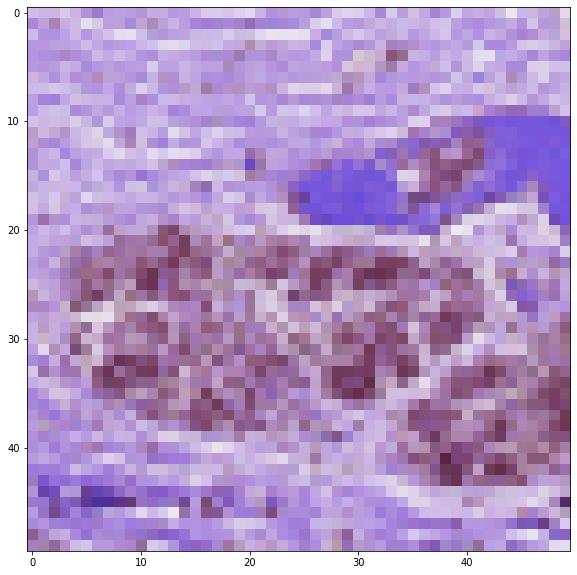

In [89]:
#plt.figure(figsize=(8,8))
plt.imshow(image_class0)

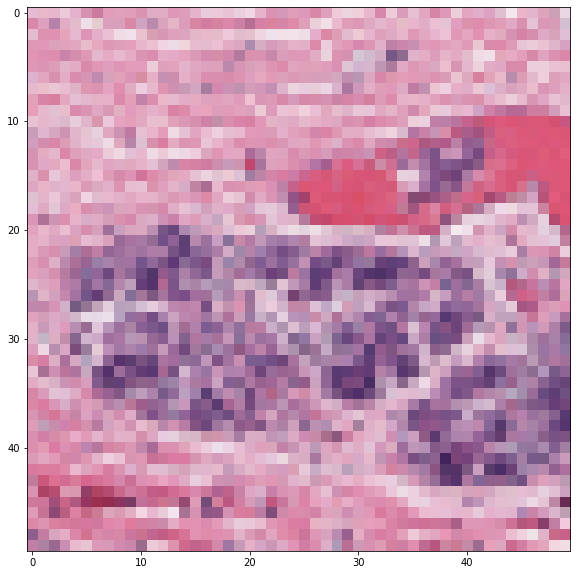

In [90]:
plt.imshow(cv2.cvtColor(image_class0, cv2.COLOR_BGR2RGB))

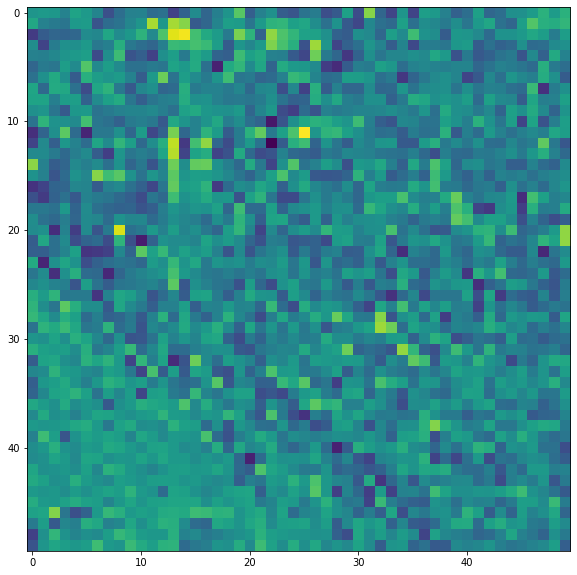

In [91]:
plt.imshow(cv2.cvtColor(image_class1, cv2.COLOR_BGR2GRAY))

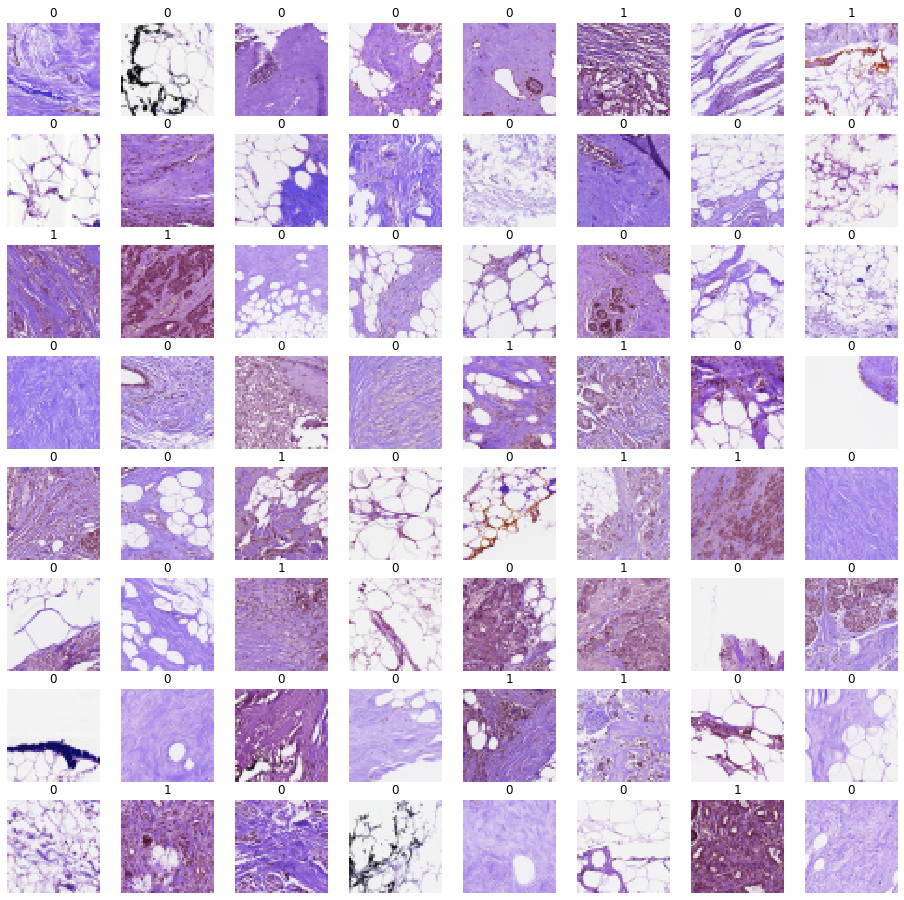

In [110]:
# Plot 64 tissue patches randomly selected
imagesForPlot = allImagePatches
i_ = 0
plt.rcParams['figure.figsize'] = (16.0, 16.0)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
random.shuffle(imagesForPlot)
for image in imagesForPlot[8459:8523]:
    title = ""
    if "class0" in image:
        title = "0"
    else:
        title = "1"
    im = cv2.imread(image)
    im = cv2.resize(im, (50, 50))     
    plt.subplot(8, 8, i_+1).set_title(title)
    plt.imshow(im); plt.axis('off')
    i_ += 1

In [124]:
data = pd.DataFrame(index=np.arange(0, noAllPatches), columns=["patient_id", "image_path", "label"])
basePath = "data/breast-histopathology-images/IDC_regular_ps50_idx5/"

j_ = 0
for n in range(noPatients):
    patientId = patients[n]
    patientPath = basePath + patientId 
    for label in [0,1]:
        classPath = patientPath + "/" + str(label) + "/"
        subfiles = listdir(classPath)
        for m in range(len(subfiles)):
            imagePath = subfiles[m]
            data.iloc[j_]["image_path"] = classPath + imagePath
            data.iloc[j_]["label"] = label
            data.iloc[j_]["patient_id"] = patientId
            j_ += 1  

,patient_id,image_path,label
0,12905,data/breast-histopathology-images/IDC_regular_...,0
1,12905,data/breast-histopathology-images/IDC_regular_...,0
2,12905,data/breast-histopathology-images/IDC_regular_...,0
3,12905,data/breast-histopathology-images/IDC_regular_...,0
4,12905,data/breast-histopathology-images/IDC_regular_...,0


In [125]:
data.to_json("dfWithPatientPathLabel.json")

<b>Load dataframe here:</b>

In [4]:
loaded_df = pd.read_json("dfWithPatientPathLabel.json")

In [134]:
loaded_df.shape

(277524, 3)

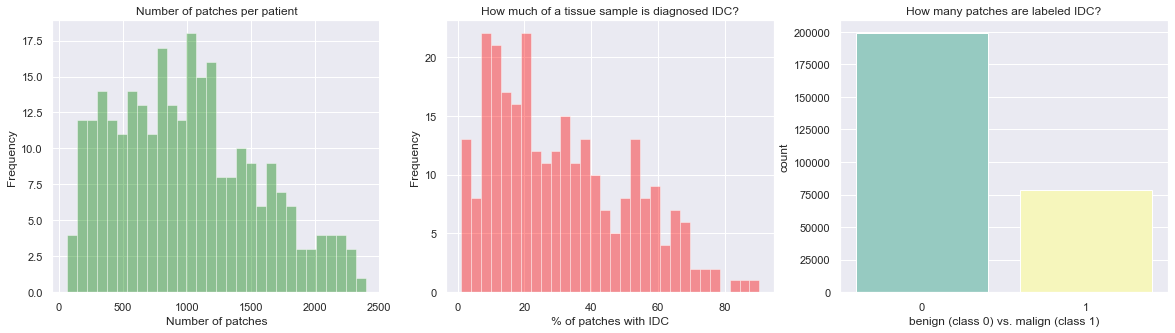

In [161]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.distplot(loaded_df.groupby("patient_id").size(), ax=ax[0], color="Green", kde=False, bins=30)
ax[0].set_xlabel("Number of patches")
ax[0].set_ylabel("Frequency");
ax[0].set_title("Number of patches per patient");

cancer_perc = loaded_df.groupby("patient_id").label.value_counts(1)

sns.distplot(cancer_perc.loc[:, 1]*100, ax=ax[1], color="Red", kde=False, bins=30)
ax[1].set_title("How much of a tissue sample is diagnosed IDC?")
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("% of patches with IDC");

sns.countplot(loaded_df.label, palette="Set3", ax=ax[2]);
ax[2].set_xlabel("benign (class 0) vs. malign (class 1)")
ax[2].set_title("How many patches are labeled IDC?");


In [162]:
def extract_coords(df):
    coord = df.image_path.str.rsplit("_", n=4, expand=True)
    coord = coord.drop([0, 1, 4], axis=1)
    coord = coord.rename({2: "x", 3: "y"}, axis=1)
    coord.loc[:, "x"] = coord.loc[:,"x"].str.replace("x", "", case=False).astype(np.int)
    coord.loc[:, "y"] = coord.loc[:,"y"].str.replace("y", "", case=False).astype(np.int)
    df.loc[:, "x"] = coord.x.values
    df.loc[:, "y"] = coord.y.values
    return df

In [163]:
extract_coords(loaded_df)

,patient_id,image_path,label,x,y
0,12905,data/breast-histopathology-images/IDC_regular_...,0,2151,2351
1,12905,data/breast-histopathology-images/IDC_regular_...,0,1201,2301
2,12905,data/breast-histopathology-images/IDC_regular_...,0,2001,2051
3,12905,data/breast-histopathology-images/IDC_regular_...,0,1501,2001
4,12905,data/breast-histopathology-images/IDC_regular_...,0,251,1651
...,...,...,...,...,...
277519,9135,data/breast-histopathology-images/IDC_regular_...,1,1601,1801
277520,9135,data/breast-histopathology-images/IDC_regular_...,1,1601,1951
277521,9135,data/breast-histopathology-images/IDC_regular_...,1,1101,1901
277522,9135,data/breast-histopathology-images/IDC_regular_...,1,1251,2051


In [ ]:
# TODO: visualize patches from coordinates

<b>The imbalanced class problem:</b>

In [32]:
size_class0 = len(loaded_df[loaded_df['label'] == 0]) #198.738
size_class1 = len(loaded_df[loaded_df['label'] == 1]) #78.786

# print(size_class0, "vs.", size_class1, "-> difference of", size_class0 - size_class1)

In [27]:
size_class0/size_class1  # 2.52 -> class 0 is 2.5 times larger than class 1!

2.522503998172264

In [25]:
loaded_df.groupby("label")["label"].count()

label
0    198738
1     78786
Name: label, dtype: int64

"Note that in medical imaging datasets, the split should always been done patient-level, meaning images of the same patient should either belong to the train or test set but not be shared among them." (https://mc.ai/skin-cancer-image-classification%E2%80%8A-%E2%80%8Aan-educational-guide/)

In [31]:
# split data


In [29]:
# augment training data: over-sampling of minority class by rotation of 90, 180, 270 degrees pr horizontal, vertical flipping